**Title**
=======================

# Setup

## Basic Imports

In [1]:
# Importing tools and declare the project root directory
#/home/hjalmarh/Documents/2HDM_project/G2HDM_v1.0.0
from importing import *

## 2HDM model

### Create model

In [5]:
from Models.setup.init_models import symbols_gen
from Models.setup.potentials import potential_V0, potential_VCT_higgs
SYMBOLS, kwargs = symbols_gen(using_omegaCB=False, using_omegaCP=True)
potentials = {"V0": potential_V0, "VCT": potential_VCT_higgs}

model = Model2HDM(name = "genCP", symbols = SYMBOLS, potentials = potentials, **kwargs)
model.save()

### Load model

In [6]:
model = load_model("genCP")

## Display model

In [7]:
from importing import *
model = load_model("genCP")

model.display_info() 

========== Model Information ==========
Field definitions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Tree-level potential:


<IPython.core.display.Math object>

Counterterm potential:


<IPython.core.display.Math object>

================== Kinetic term ==================


<IPython.core.display.Math object>

=============== Gauge boson masses ===============


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Mass ratio:


<IPython.core.display.Math object>

Top quark mass (type II):


<IPython.core.display.Math object>

# Tree-level

In [6]:
model.generate_level0_masses(VEV=True, show_procedure=True, show_solution=True, solve_eigenvalues=False)

Tadpole equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Solutions to the tadpole equations:


Eq(Y_1, -Z_1*v**2/2 - Z_3*v_{CB}**2/2)

Eq(Y_2, -Z_2*v_{CB}**2/2 - Z_3*v**2/2)

Eq(re(Y_{12}), v**2*re(Z_6)/2 + v_{CB}**2*re(Z_7)/2)

Eq(im(Y_{12}), v**2*im(Z_6)/2 + v_{CB}**2*im(Z_7)/2)

Mass matrix:


Matrix([
[        Z_1*v**2,                        v**2*re(Z_6), 0,                        -v**2*im(Z_6),                      v*v_{CB}*re(Z_6),      Z_3*v*v_{CB},                      v*v_{CB}*im(Z_6), 0],
[    v**2*re(Z_6),         Z_4*v**2/2 + v**2*re(Z_5)/2, 0,                      -v**2*im(Z_5)/2,   Z_4*v*v_{CB}/2 + v*v_{CB}*re(Z_5)/2,  v*v_{CB}*re(Z_7),                    v*v_{CB}*im(Z_5)/2, 0],
[               0,                                   0, 0,                                    0,                                     0,                 0,                                     0, 0],
[   -v**2*im(Z_6),                     -v**2*im(Z_5)/2, 0,          Z_4*v**2/2 - v**2*re(Z_5)/2,                   -v*v_{CB}*im(Z_5)/2, -v*v_{CB}*im(Z_7),  -Z_4*v*v_{CB}/2 + v*v_{CB}*re(Z_5)/2, 0],
[v*v_{CB}*re(Z_6), Z_4*v*v_{CB}/2 + v*v_{CB}*re(Z_5)/2, 0,                  -v*v_{CB}*im(Z_5)/2, Z_4*v_{CB}**2/2 + v_{CB}**2*re(Z_5)/2, v_{CB}**2*re(Z_7),                   v_{CB}**2*im(Z_5)/2, 0],
[

In [7]:
model.generate_level0_masses(solve_eigenvalues=False)

Tadpole equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Solutions to the tadpole equations:


Eq(Y_1, -Z_1*v**2/2 - Z_3*v_{CB}**2/2)

Eq(Y_2, -Z_2*v_{CB}**2/2 - Z_3*v**2/2)

Eq(re(Y_{12}), v**2*re(Z_6)/2 + v_{CB}**2*re(Z_7)/2)

Eq(im(Y_{12}), v**2*im(Z_6)/2 + v_{CB}**2*im(Z_7)/2)

Mass matrix:


Matrix([
[                 3*Z_1*\omega**2/2 - Z_1*v**2/2 + Z_3*\omega_{CB}**2/2 - Z_3*v_{CB}**2/2,                       3*\omega**2*re(Z_6)/2 + \omega_{CB}**2*re(Z_7)/2 - v**2*re(Z_6)/2 - v_{CB}**2*re(Z_7)/2,                                                                                     0,                      -3*\omega**2*im(Z_6)/2 - \omega_{CB}**2*im(Z_7)/2 + v**2*im(Z_6)/2 + v_{CB}**2*im(Z_7)/2,                                                                                              \omega*\omega_{CB}*re(Z_6),                                                                  Z_3*\omega*\omega_{CB},                                                                                              \omega*\omega_{CB}*im(Z_6),                                                                                      0],
[ 3*\omega**2*re(Z_6)/2 + \omega_{CB}**2*re(Z_7)/2 - v**2*re(Z_6)/2 - v_{CB}**2*re(Z_7)/2, Z_2*\omega_{CB}**2/2 - Z_2*v_{CB}**2/2 + Z_3*\omega**2/2 - Z_3*v**2/2 + Z_4*\ome

# One-loop level

## Solve for the counterterms

In [8]:

params_CT = model.VCT_params

model.SYMBOLS["a"] = sp.symbols("a")
model.SYMBOLS["b"] = sp.symbols("b")
model.SYMBOLS["c"] = sp.symbols("c")
model.SYMBOLS["d"] = sp.symbols("d")


constraints = [sp.Eq(params_CT[7], model.symbol("a")* params_CT[6]),
               sp.Eq(params_CT[9], model.symbol("b") * params_CT[8]),
               sp.Eq(params_CT[11], model.symbol("c") * params_CT[10]),
               sp.Eq(params_CT[13], model.symbol("d") * params_CT[12])]    


model.solve_counterterms(extra_eqs=None, show_procedure=False)

==================== Solution ====================


Eq(\delta Y_1, H_{11}/2 + H_{16}*v_{CB}/(2*v) - 3*H_{47}*v_{CB}/(2*v) - 3*H_{77}/2)

Eq(\delta Y_2, H_{16}*v/(2*v_{CB}) + H_{66}/2 - 3*H_{88}/2)

Eq(\delta Z_1, -H_{11}/v**2 + H_{47}*v_{CB}/v**3 + H_{77}/v**2)

Eq(\delta Z_2, -H_{66}/v_{CB}**2 + H_{88}/v_{CB}**2)

Eq(\delta Z_3, -H_{16}/(v*v_{CB}))

Eq(\delta Z_4, 2*H_{47}/(v*v_{CB}) - H_{55}/v_{CB}**2 + H_{77}/v_{CB}**2)

Eq(re(\delta Y_{12}), -H_{15}*v/(2*v_{CB}) + H_{34} - H_{56}/2 + H_{78}/2)

Eq(im(\delta Y_{12}), -H_{17}*v/(2*v_{CB}) + H_{23} - H_{58}/2 - H_{67}/2)

Eq(re(\delta Z_5), -H_{55}/v_{CB}**2 + H_{77}/v_{CB}**2)

Eq(im(\delta Z_5), -2*H_{57}/v_{CB}**2)

Eq(re(\delta Z_6), -H_{15}/(v*v_{CB}))

Eq(im(\delta Z_6), -H_{17}/(v*v_{CB}))

Eq(re(\delta Z_7), -H_{56}/v_{CB}**2 + H_{78}/v_{CB}**2)

Eq(im(\delta Z_7), -H_{58}/v_{CB}**2 - H_{67}/v_{CB}**2)

Eq(\delta T_1, H_{47}*v_{CB} + H_{77}*v - N_{1})

Eq(\delta T_2, H_{34}*v - N_{2})

Eq(\delta T_{CP}, H_{14}*v/2 + H_{17}*v**2/(2*v_{CB}) - H_{23}*v/2 - N_{4})

Eq(\delta T_{CB}, H_{88}*v_{CB} - N_{6})

Eq(\delta\Delta_{13}, -H_{13}/(2*v))

Eq(\delta\Delta_{33}, -H_{33}/(2*v) + H_{47}*v_{CB}/(2*v**2) + H_{77}/(2*v))

Eq(\delta\Delta_{14}, -H_{14}/(2*v) - H_{17}/(2*v_{CB}) - H_{23}/(2*v))

Eq(\delta\Delta_{24}, -H_{24}/v - H_{57}*v/v_{CB}**2)

Eq(\delta\Delta_{67}, H_{23}/v + H_{58}/v)

Eq(\delta\Delta_{78}, H_{34}/v - H_{78}/v)

============= Consistency equations ==============


Eq(N_{3}, H_{13}*v/2)

Eq(N_{5}, H_{34}*v_{CB})

Eq(N_{7}, H_{23}*v_{CB})

Eq(H_{12}, H_{15}*v/v_{CB} + H_{34})

Eq(H_{22}, -H_{47}*v/v_{CB} + H_{55}*v**2/v_{CB}**2 - H_{77}*v**2/v_{CB}**2 + H_{88})

Eq(H_{25}, -H_{47} + H_{55}*v/v_{CB} - H_{77}*v/v_{CB})

Eq(H_{26}, H_{56}*v/v_{CB} - H_{78}*v/v_{CB})

Eq(H_{27}, H_{57}*v/v_{CB})

Eq(H_{44}, -H_{47}*v/v_{CB} + H_{88})

Eq(H_{45}, -H_{57}*v/v_{CB})

Eq(H_{46}, -H_{58}*v/v_{CB} - H_{67}*v/v_{CB})

# Plotting

In [10]:
from importing import *
model = load_model("higgsCB")

#Tadpole conditions
Z1, R_Z6, I_Z6 = 1, 1, 1
v = 246 #model.omega
Y11 = -v**2/2*Z1
R_Y12 = v**2/2*R_Z6
I_Y12 = v**2/2*I_Z6

params_values = [Y11, -v**2/2,
                    Z1,1,4,4,
                    R_Y12,I_Y12,
                    -1,-1,R_Z6,I_Z6,-1,1]

# Assigning the values to the parameters
model.assign_V0_params_values(params_values)
model.assign_bgfield_values([v,0,0,0,0,0,0,0])
model.assign_VEV_values([v,0,0,0,0,0,0,0])

model.calculate_counterterm_values()

=============== Counterterm values ===============


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Tree-level

## Plot effective potential and masses

In [16]:
N = 200
v = 246
model.calculate_data2D_level1(model.symbol("omega"), N,Xrange=[0*v,2*v], calc_potential=False)
load_and_plot_data2D(model, level=1, name=f"{N}", plot_potential=False)

# Check for complex components!!

KeyboardInterrupt: 

mass_level1_data
test {'omega': [0.0, 10.040816326530612, 20.081632653061224, 30.12244897959184, 40.16326530612245, 50.20408163265306, 60.24489795918368, 70.28571428571428, 80.3265306122449, 90.36734693877553, 100.40816326530611, 110.44897959183672, 120.48979591836736, 130.53061224489795, 140.57142857142856, 150.6122448979592, 160.6530612244898, 170.6938775510204, 180.73469387755105, 190.77551020408163, 200.81632653061223, 210.8571428571429, 220.89795918367344, 230.93877551020407, 240.9795918367347, 251.0204081632653, 261.0612244897959, 271.1020408163265, 281.1428571428571, 291.18367346938777, 301.2244897959184, 311.265306122449, 321.3061224489796, 331.3469387755102, 341.3877551020408, 351.4285714285714, 361.4693877551021, 371.5102040816327, 381.55102040816325, 391.59183673469386, 401.63265306122446, 411.6734693877551, 421.7142857142857, 431.7551020408163, 441.7959183673469, 451.83673469387753, 461.8775510204081, 471.91836734693874, 481.9591836734694, 492.0], 'm_1': [-280.4632663270371

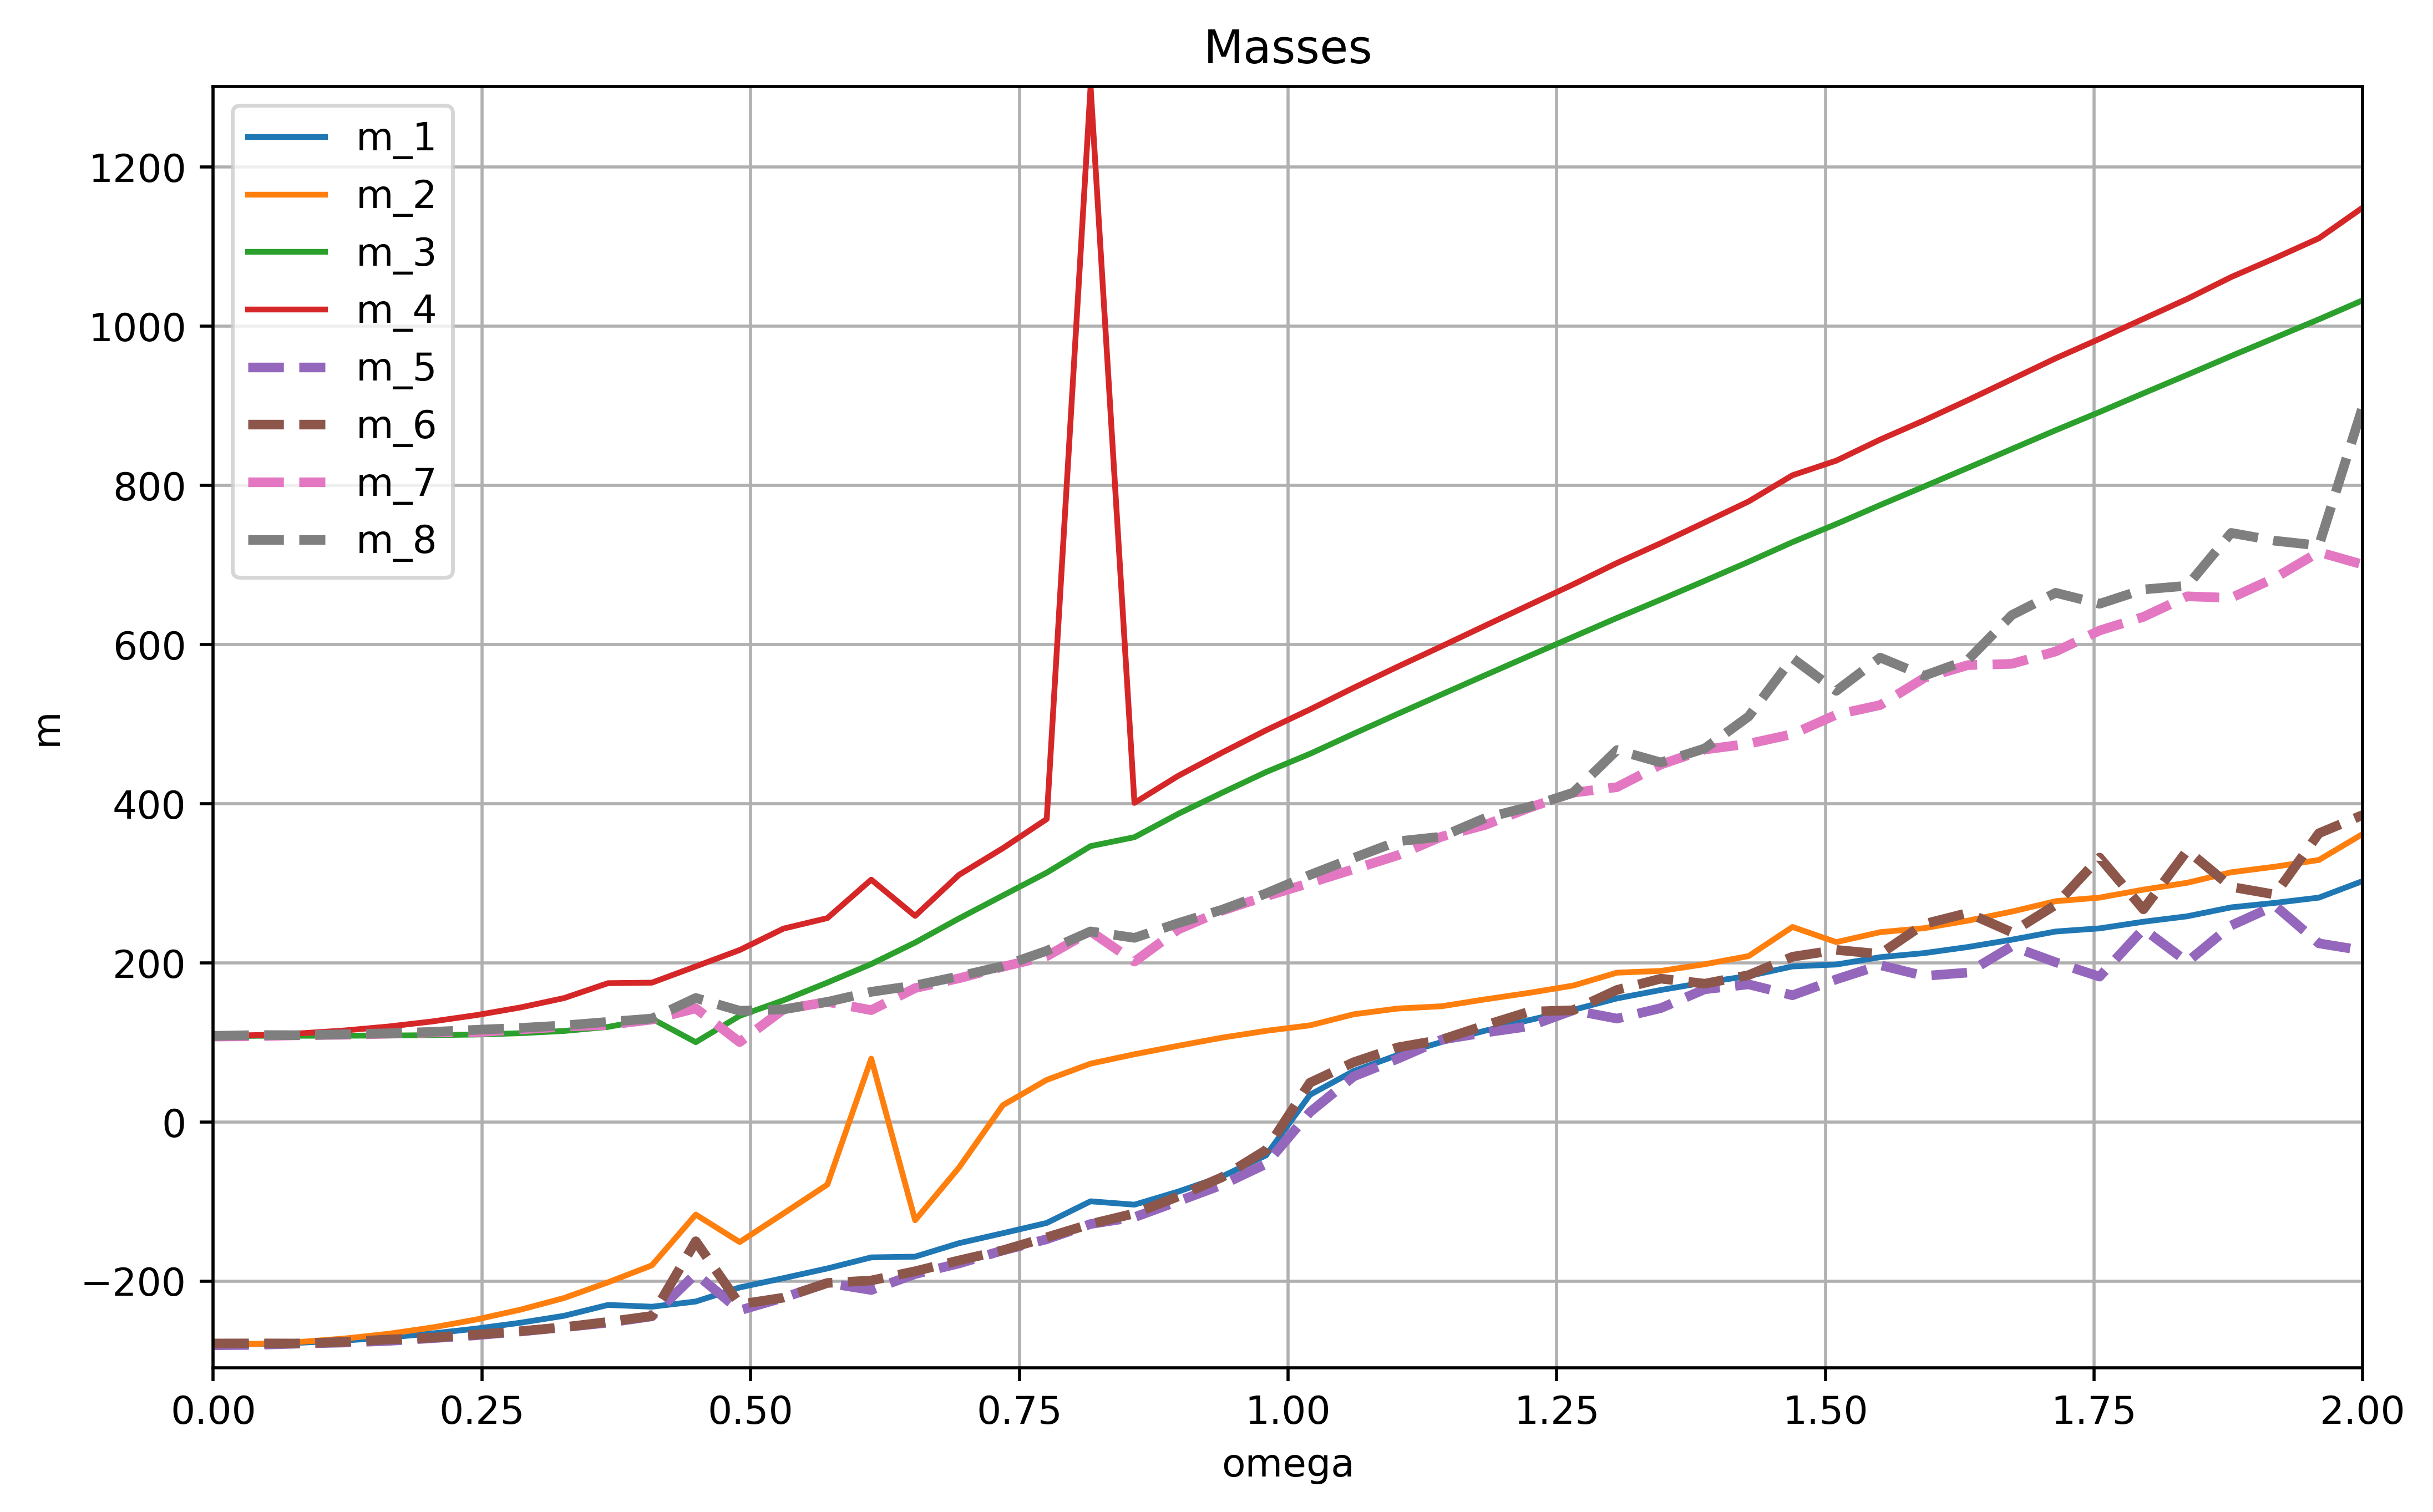

In [16]:
model.plot_data2D(level=1, name=f"{N}", plot_potential=False)

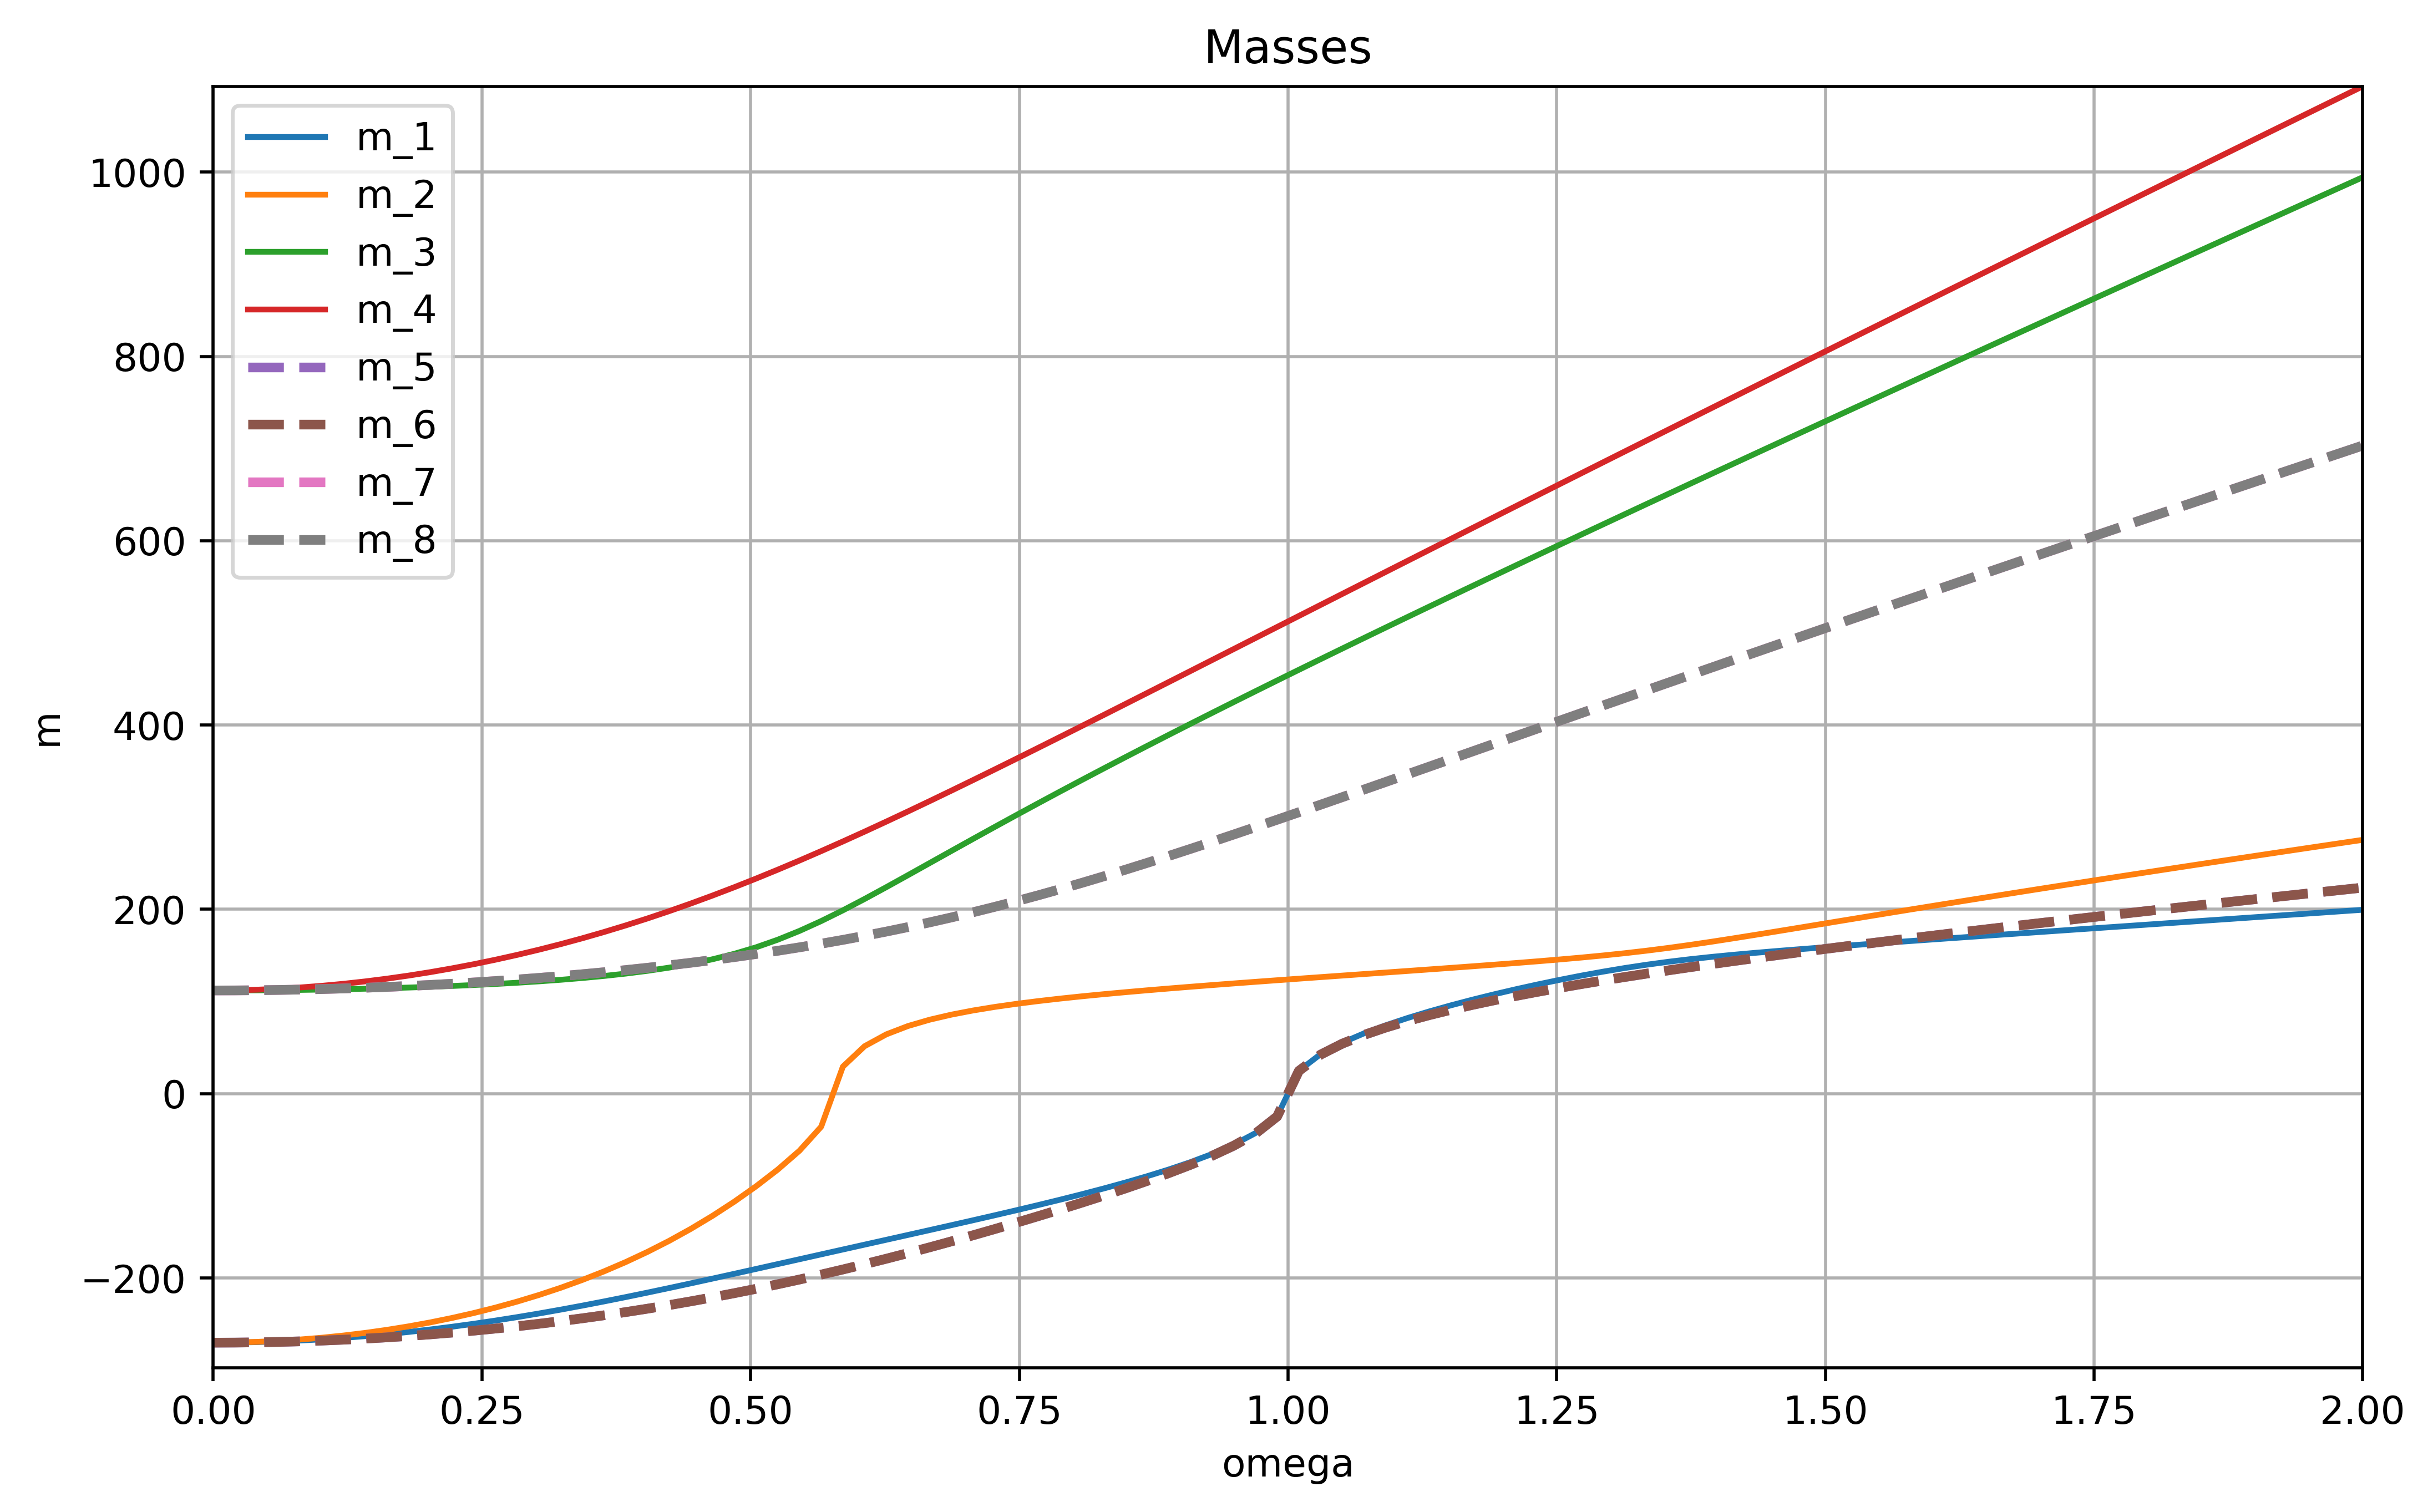

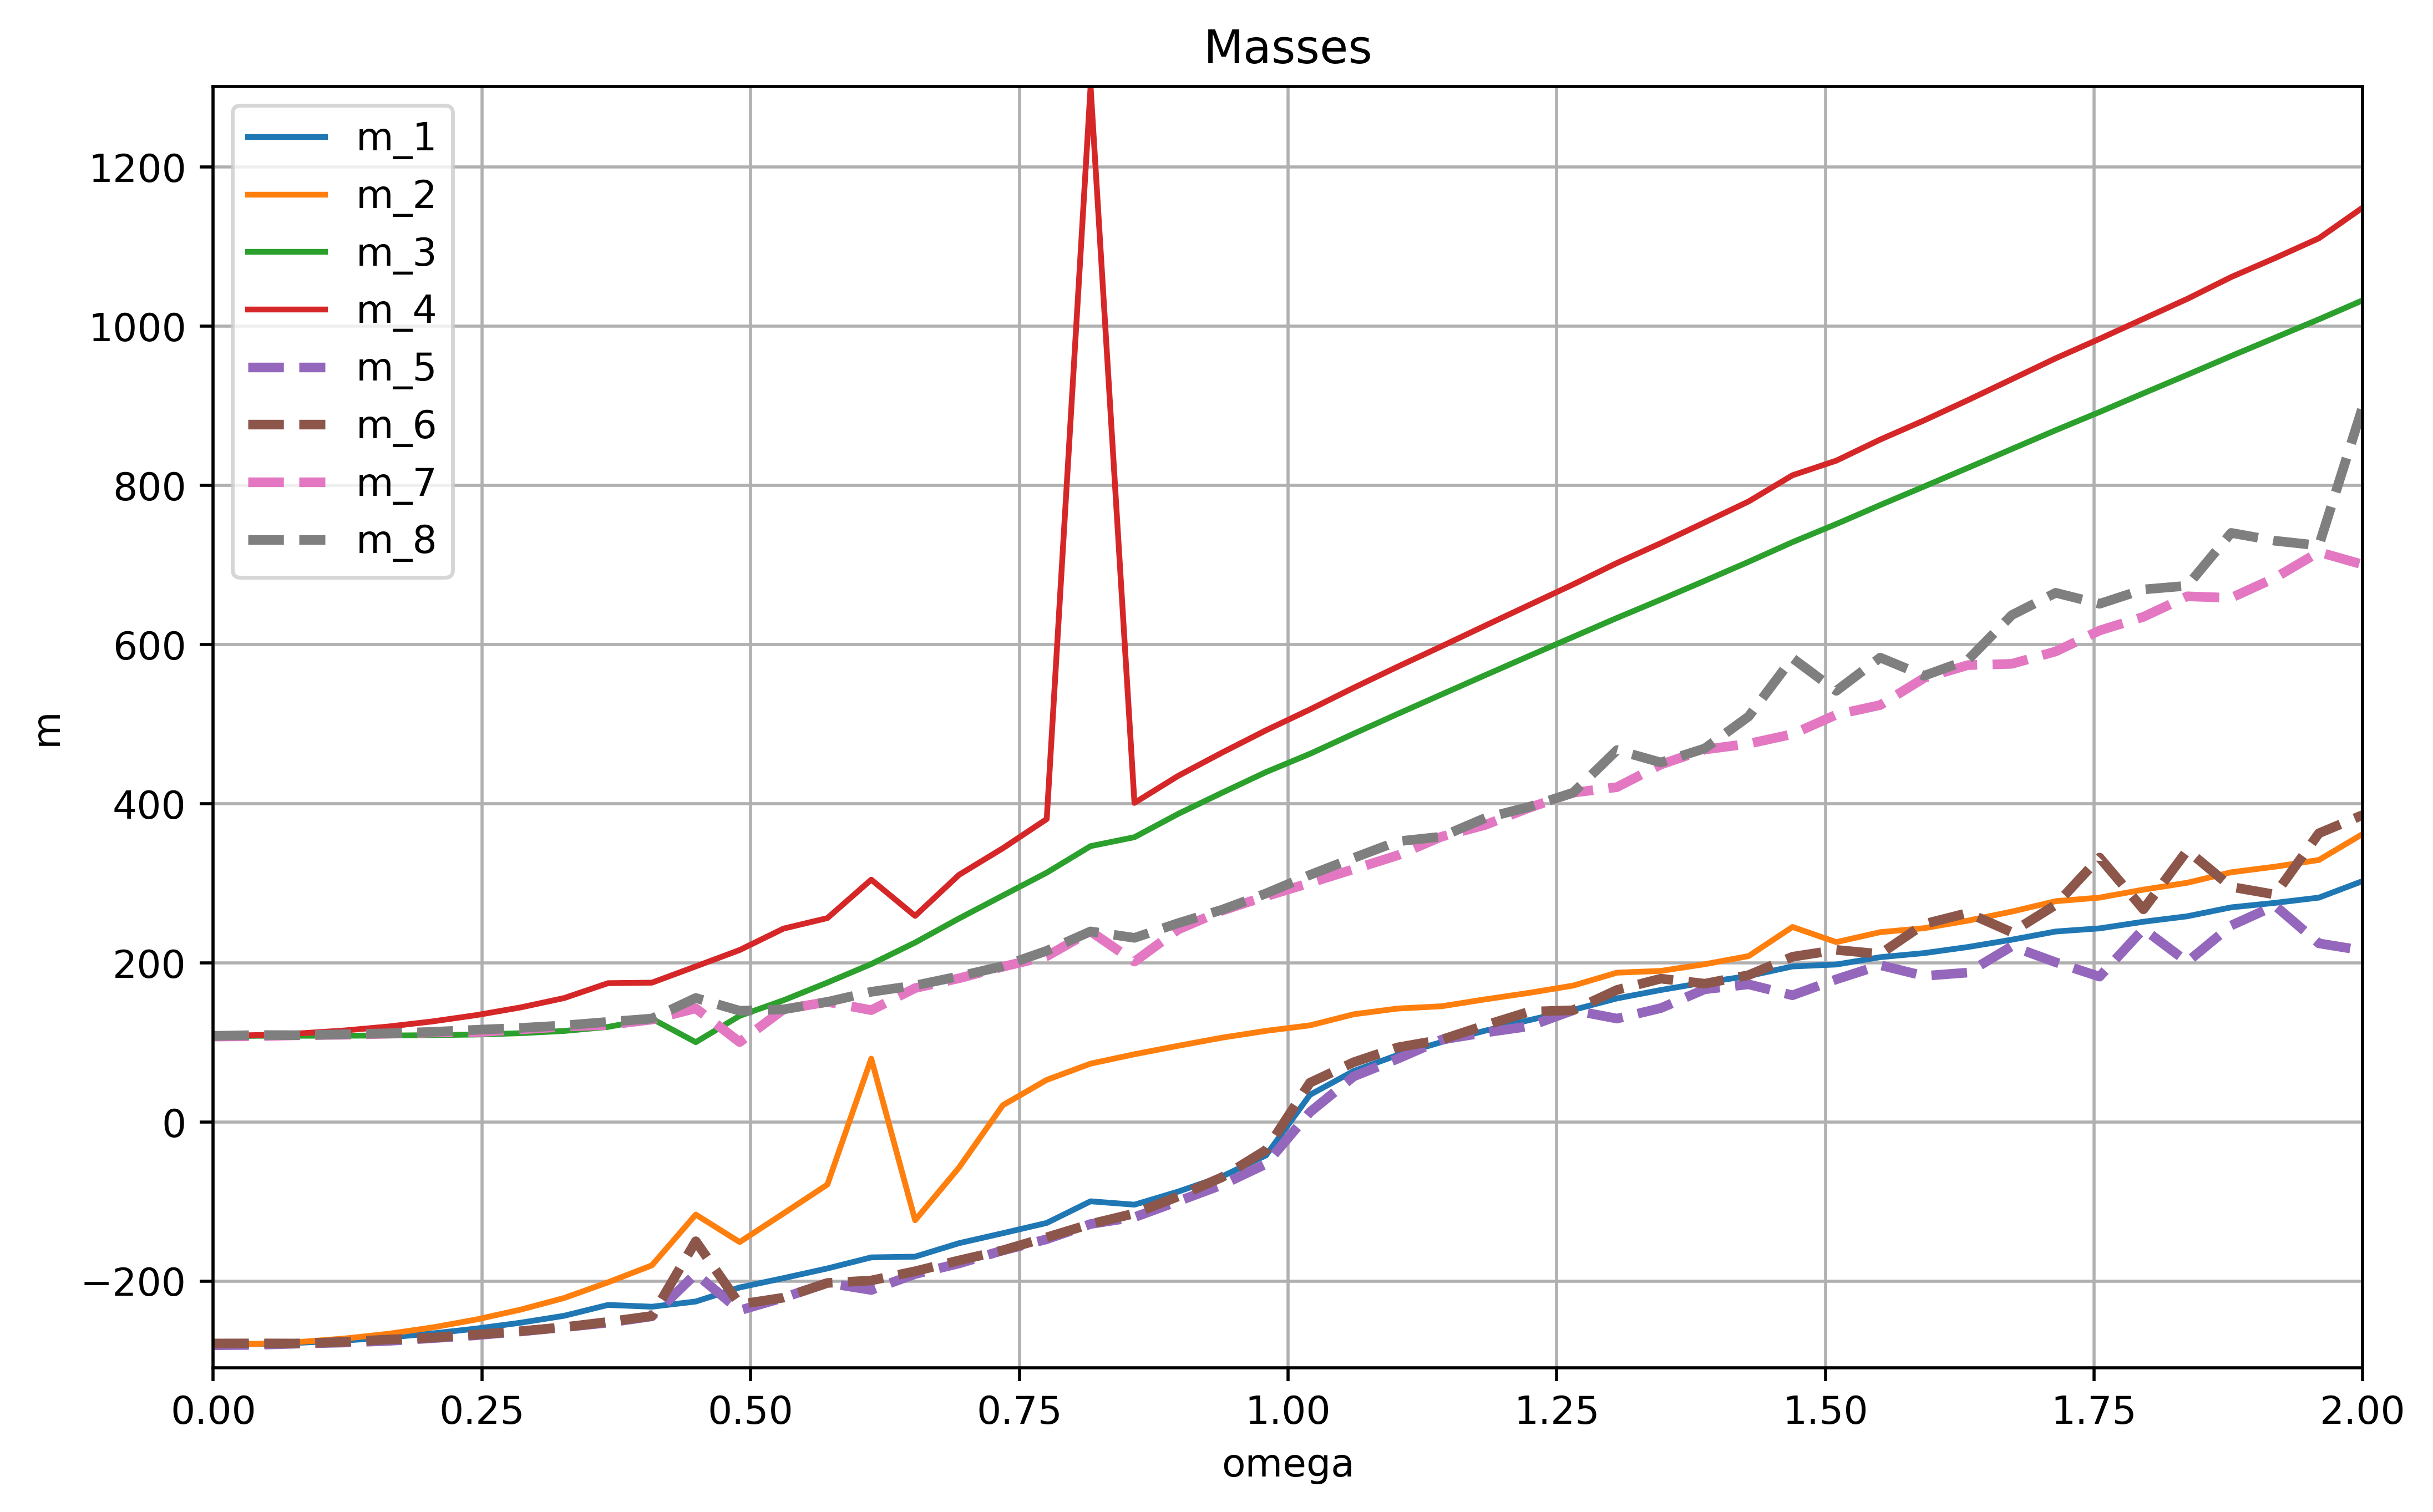

In [10]:
model.plot_data2D(level=0, name=f"", plot_potential=False)
model.plot_data2D(level=1, name=f"50", plot_potential=False)

# Debugging

In [ ]:
##### Debug/Check #####
reload_and_import("Code.Model2HDM.methods_Model2HDM", "calculate_CW_potential_derivatives_numerical")

import Code.Utils.constants as const
print(const.v)

v = 246
fields = model.field("fields")
fields_mass = model.field("mass")
params = model.params("V0", complex=False)
params_values_subs = {param:value for param, value in zip(params, params_values)}
bgfields_values_subs = {model.symbol("omega"): 246, model.symbol("omegaCB"): 0}
VEV_values_subs = {model.symbol("v"): v, model.symbol("vCB"): 0}

M0 = model.masses("M0")
M0_numerical = M0.subs(bgfields_values_subs | VEV_values_subs | params_values_subs).evalf()

V0 = model.potential("V0")
V0 = V0.subs(bgfields_values_subs | VEV_values_subs | params_values_subs).evalf()

display(M0_numerical)

result = _calculate_CW_potential_derivatives_numerical(M0_numerical, V0, fields, fields_mass,
                                                    show_procedure=False)

display(*result)

# Parameter search

In [4]:
from importing import *
model = load_model("higgs")

#Tadpole conditions
Z1, R_Z6, I_Z6 = 1, 1, 1
v = 246 #model.omega
Y11 = -v**2/2*Z1
R_Y12 = v**2/2*R_Z6
I_Y12 = v**2/2*I_Z6
# Mass parameter reassign
MHp, Z3 = 500, 4
Y22 = MHp - (v**2/2)*Z3

params_values = [Y11, Y22,
                    Z1,1,Z3,4,
                    R_Y12,I_Y12,
                    -1,-1,R_Z6,I_Z6,-1,1]

# Assigning param search inputs

#x1, x2, x3, x4, x5, x6 = sp.symbols("x1 x2 x3 x4 x5 x6")
#params_free = [x1, x2, x3, x4, x5, x6]
#params_relations = [x1, x2, x3, x4, x5, x6, 0, 0, 0, 0, 0, 0, 0, 0] + [246]
#params_ranges=[(0,1), (0,1), (0,1), (0,1), (0,1), (0,1)]

#
x11, x22, x1, x2, x3, x4, rx12, ix12, rx5, ix5, rx6, ix6, rx7, ix7 = sp.symbols("x11 x22 x1 x2 x3 x4 rx12 ix12 rx5 ix5 rx6 ix6 rx7 ix7")
mHp = sp.symbols("mHp")
params_relations = [-v**2/2*x1, mHp - (v**2/2)*x3, x1, x2, x3, x4, v**2/2*rx6, v**2/2*rx6, rx5, ix5, rx6, ix6, rx7, ix7] + [246]
params_free = [mHp, x1, x2, x3, x4, rx5, ix5, rx6, ix6, rx7, ix7]
params_ranges=[(0,1000), (0,4*np.pi), (0,4*np.pi),(0,4*np.pi),(0,4*np.pi),(0,4*np.pi),(0,4*np.pi),(0,4*np.pi),(0,4*np.pi),(0,4*np.pi),(0,4*np.pi)]

model.assign_param_search_inputs(params_ranges, params_free, params_relations)

#params_ranges, params_free, params_relations,
model.param_search(filename="run2",
                 N_processes=2, runtime=2, iterations=1, merge=True)

Free parameters:  11
Processes: 2
Max runtime: 0h:0m:2s
Max iterations: 1
Press enter to stop the worker processes. 

Iterations: 0 | Runtime: 0h:0m:2s | Sec/iteration: 0.00 | Iterations/hour: 0 |         
Max runtime reached. Stopping...
Thread 1 finished.
Thread 2 finished.
All processes finished. Collecting results...
Data saved to: /home/hjalmarh/Documents/2HDM_project/G2HDM_v1.0.0/Models/Saved models/higgs/Data/test_ps.csv 
File size on disk: 970 Byte



Stopping...


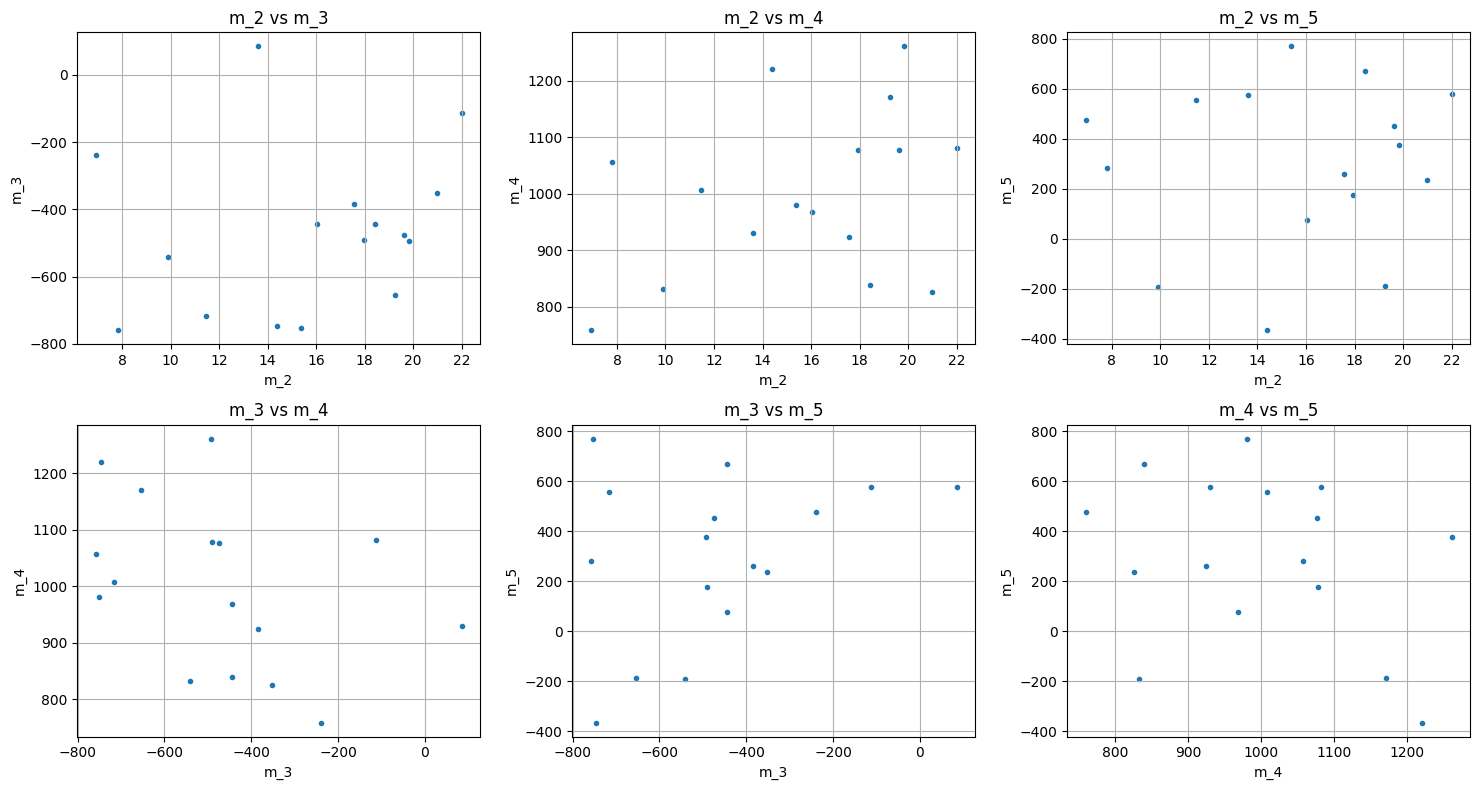

In [5]:
data = model.load_data(filename="paramsearch")
#display(data)
from itertools import combinations
import math

# Generate all combinations of the data keys
keys = ["m_1", "m_2", "m_3", "m_4", "m_5", "m_6"]
keys = ["m_2", "m_3", "m_4", "m_5"]
combinations_of_data = list(combinations(keys, 2))

# Determine the number of rows and columns for subplots
n_combinations = len(combinations_of_data)
n_cols = 3  # Number of columns (adjust as needed)
n_rows = math.ceil(n_combinations / n_cols)

# Plot all combinations
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, (key_x, key_y) in enumerate(combinations_of_data):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(data[key_x], data[key_y], marker=".")
    plt.xlabel(key_x)
    plt.ylabel(key_y)
    plt.title(f'{key_x} vs {key_y}')
    plt.grid(True)

plt.tight_layout()  # Ensure layout is neat
plt.show()